<a href="https://colab.research.google.com/github/madrigranok/MAT421/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction
The aim of this project is to model a dataset using the skills we have learned in class this semester.  For this project, I will be using a data set that compares the sizes and weights of dogs to their percieved intellegence.  It is commonly agreed that larger dogs have a higher intellect than smaller dogs.  The dataset I am using is from Kaggle and compares the sizes, weights, and number of times it takes for a breed to obey a new command for 136 different breeds.  This dataset is based on research by Stanley Coren, a professor of canine psychology at the University of British Columbia.  It is pressumed that the lower height and weight levels are those associated with the smaller numbers when you look up a certain breed's aspects and the higher height and weight levels are associated with the larger number.

## Theory
I plan on using bar graphs to show the top 10 for shortest breeds, tallest breeds, lightest breeds, and heaviest breeds.  Then using the number of repetitions a new command was called, I will use histograms to show the distribution across the board for all dogs with the minimum and maximum number of times a command needed to be repeated.  I can also demonstrate using these sets to get an average number as my final goal is to get a heat map to show correlation between size and intellegence.  For the heat map, I will need the minimum height, average height, maximum height, minimum weight, average weight, maximum weight, minimum repetition, average repetition, and the maximum repetition values.  I personally like heat maps because they're easy to follow when trying to determine if many factors correlate with other factors.  I will also be using scatter plots to show the data comparing heights and weights with repetition to see if it can be argued that larger dogs are more intellegent.  I brought it up previously in my proposal that the size of a dog might not directly effect their intelligence because of there simply being more room for a larger brain, but that I personally believe that prey mentality has a large impact on the outcome of the data.  Although, Im not a canine psychologist, so I can't be for certain and am simply using this dataset to demonstrate what we have learned.

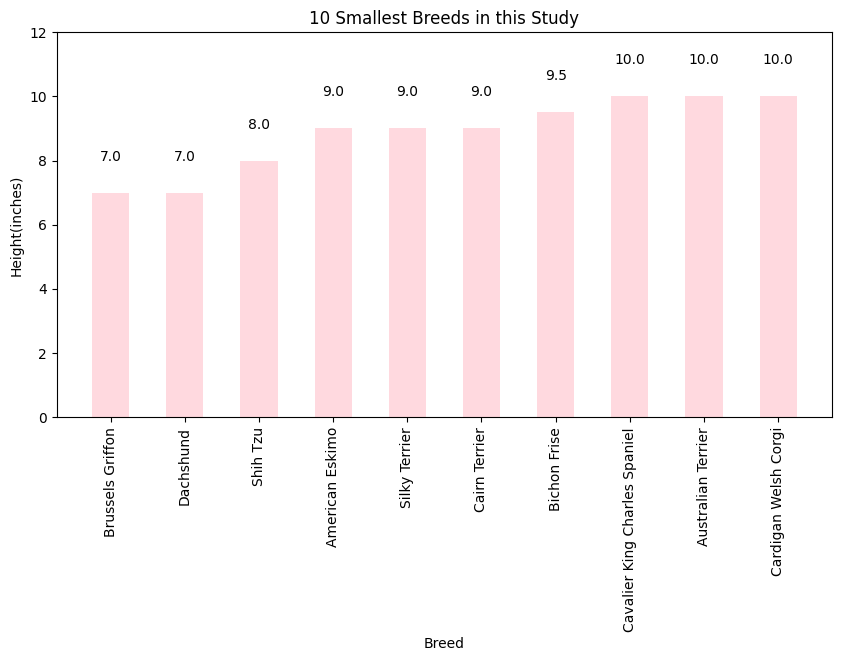

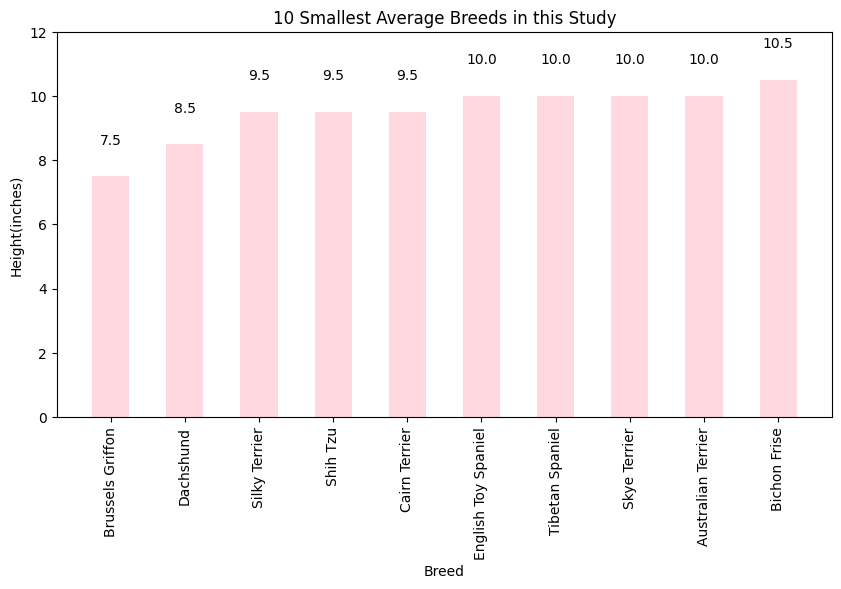

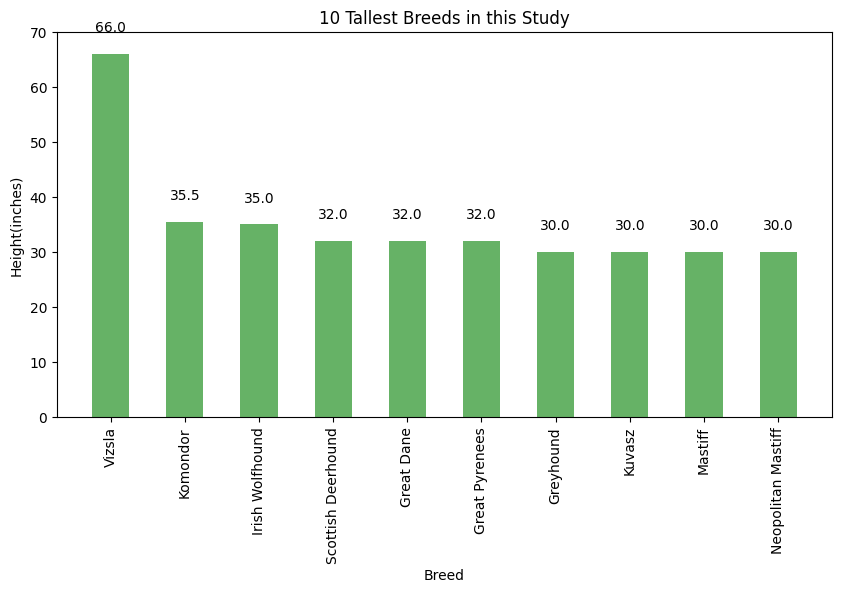

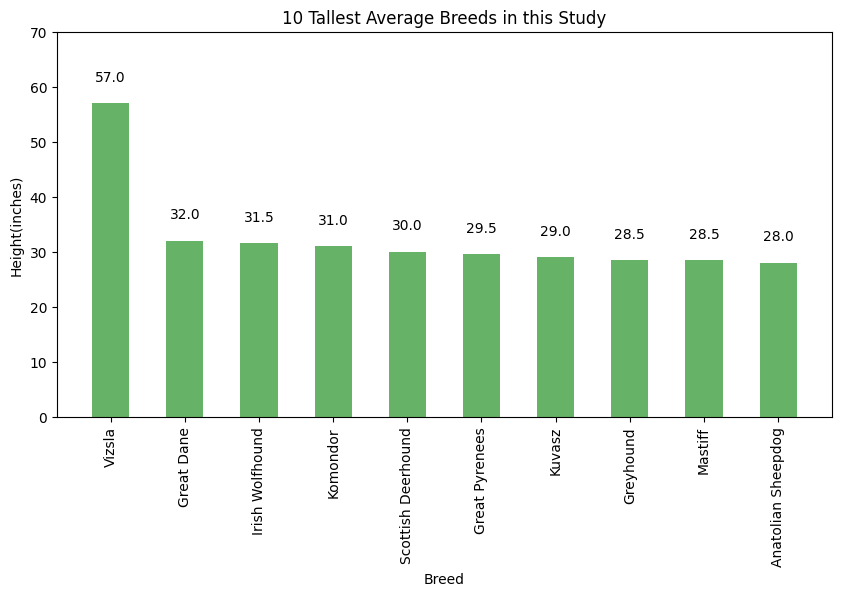

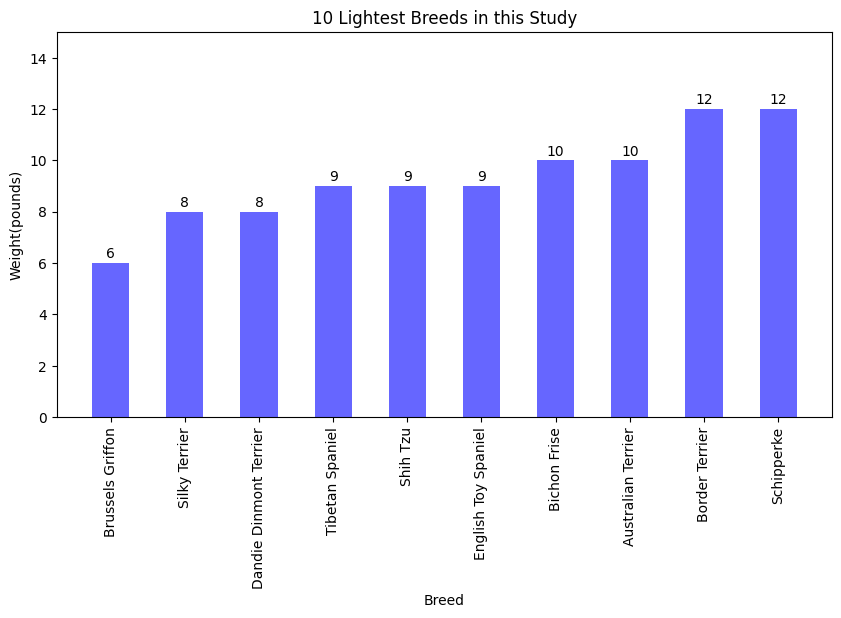

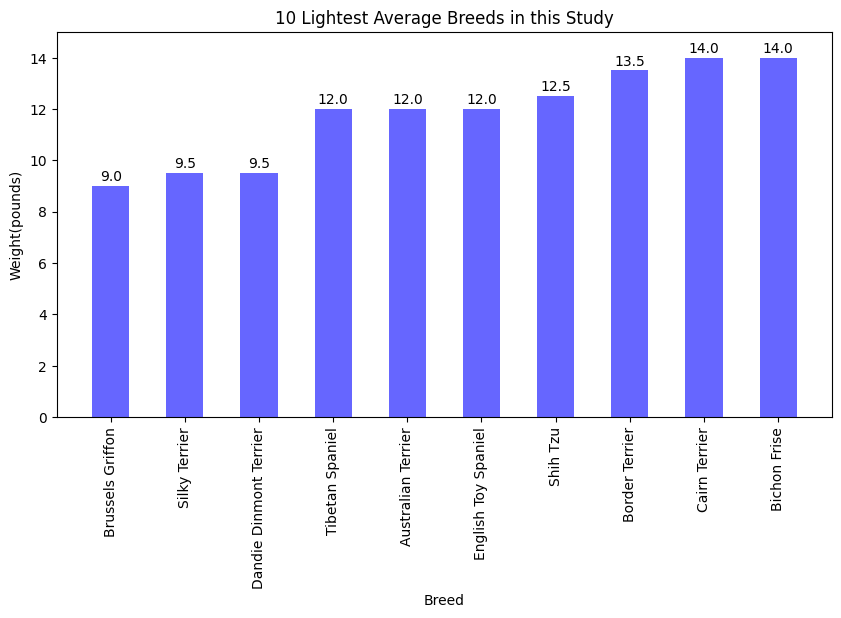

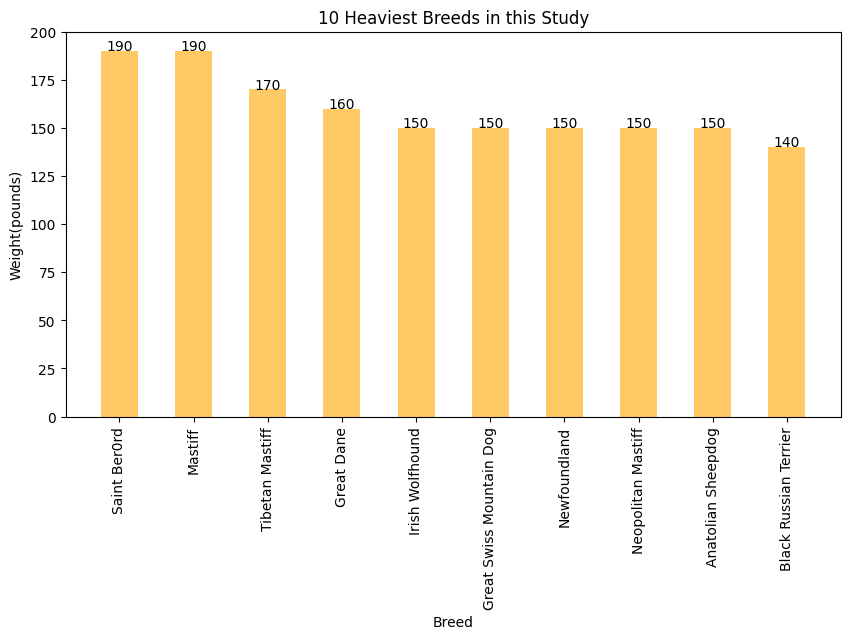

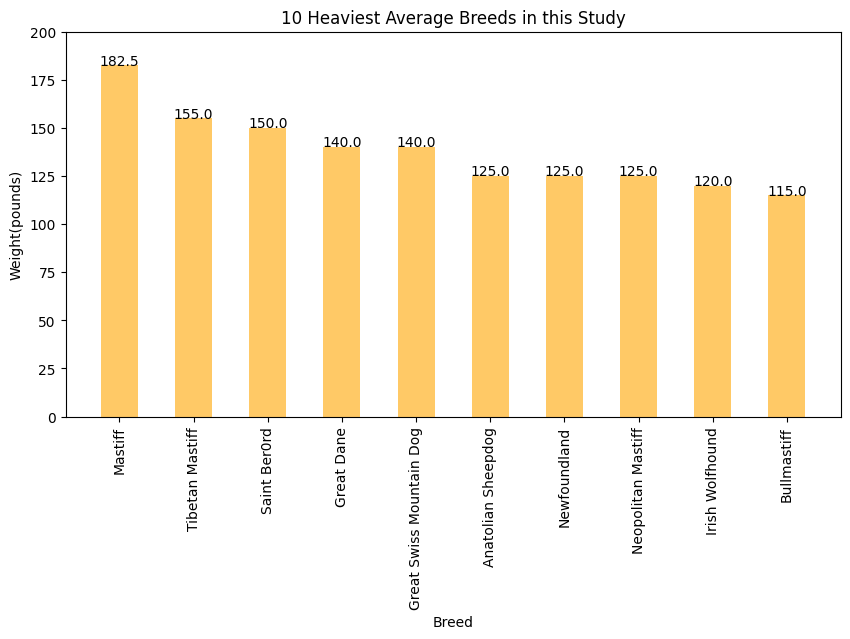

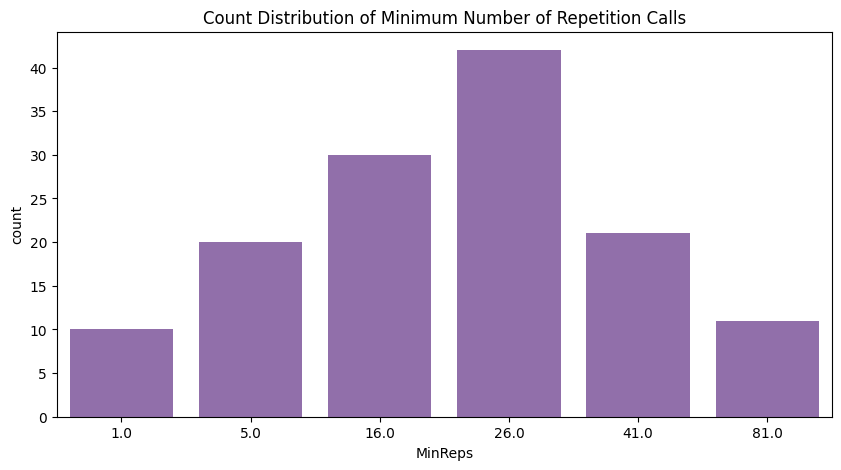

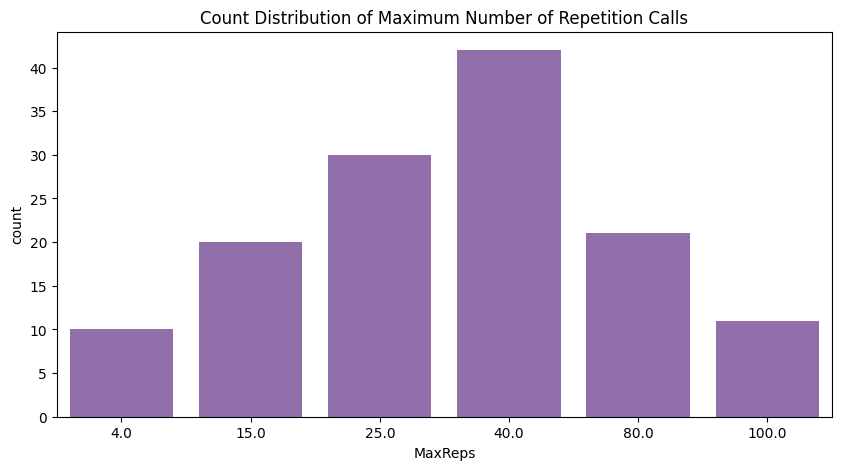

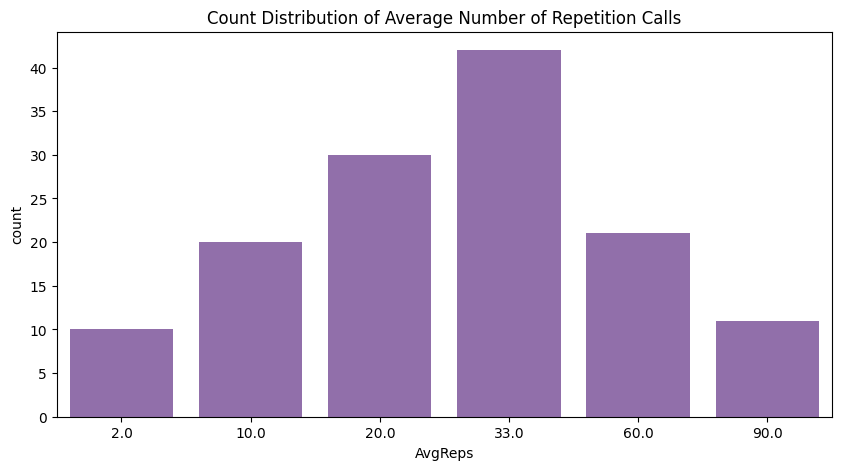

<ipython-input-15-7c0f73f10baf>:199: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(df.corr(), annot = True, cmap = "BuPu", linewidth = 0.01)


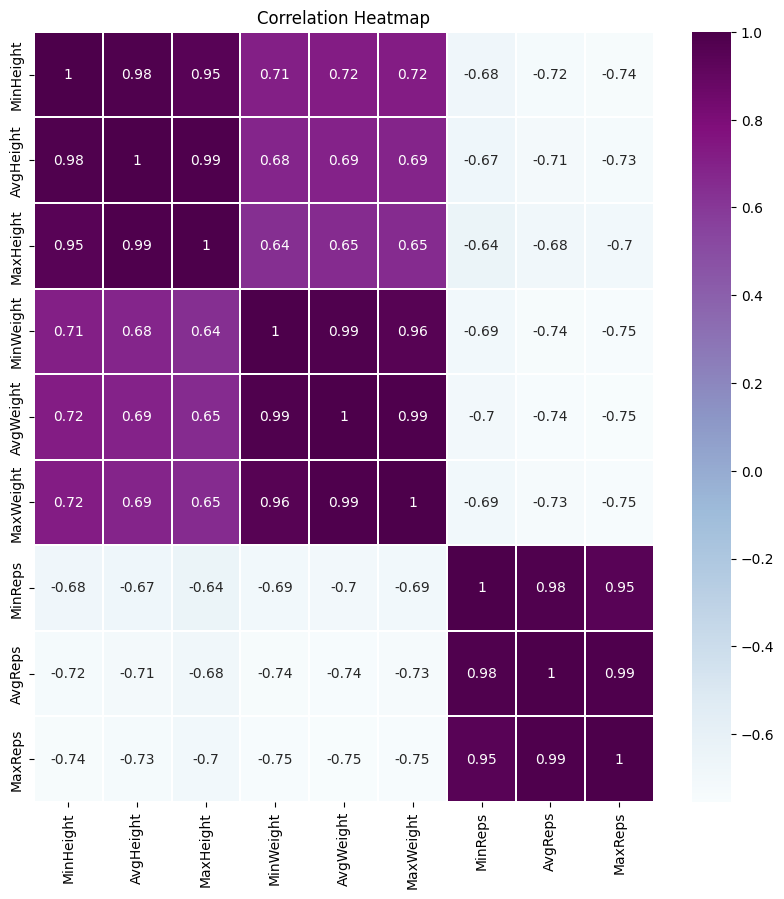

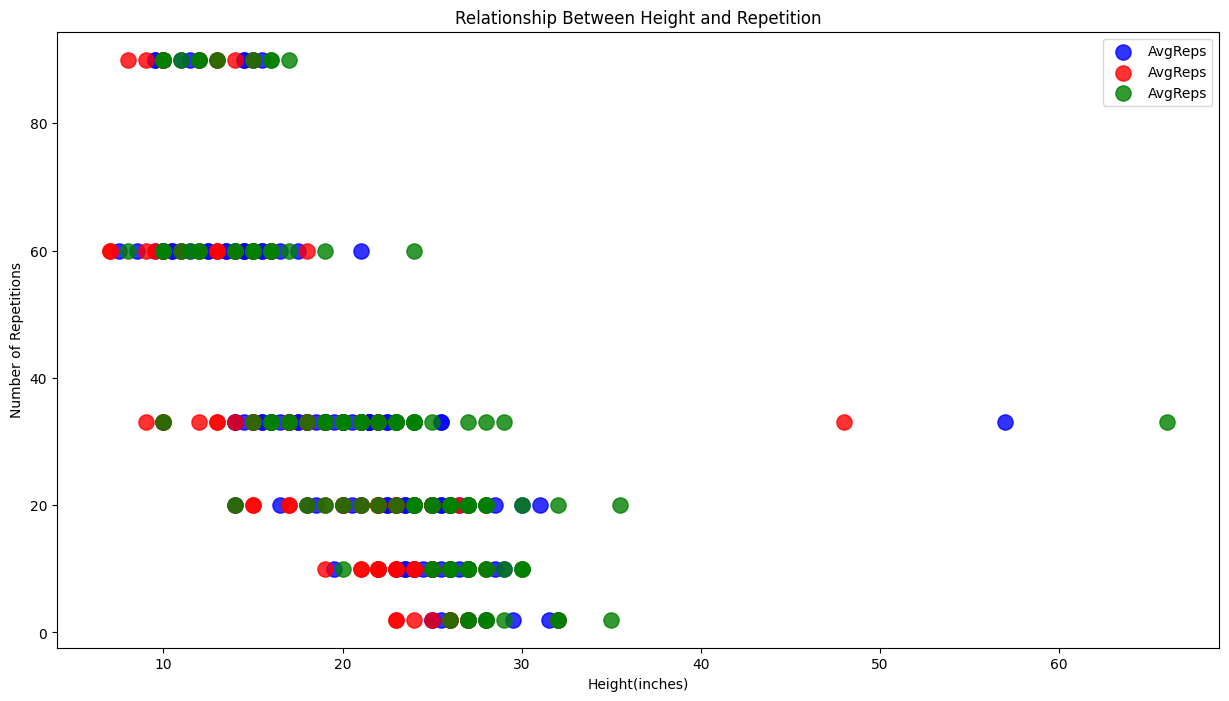

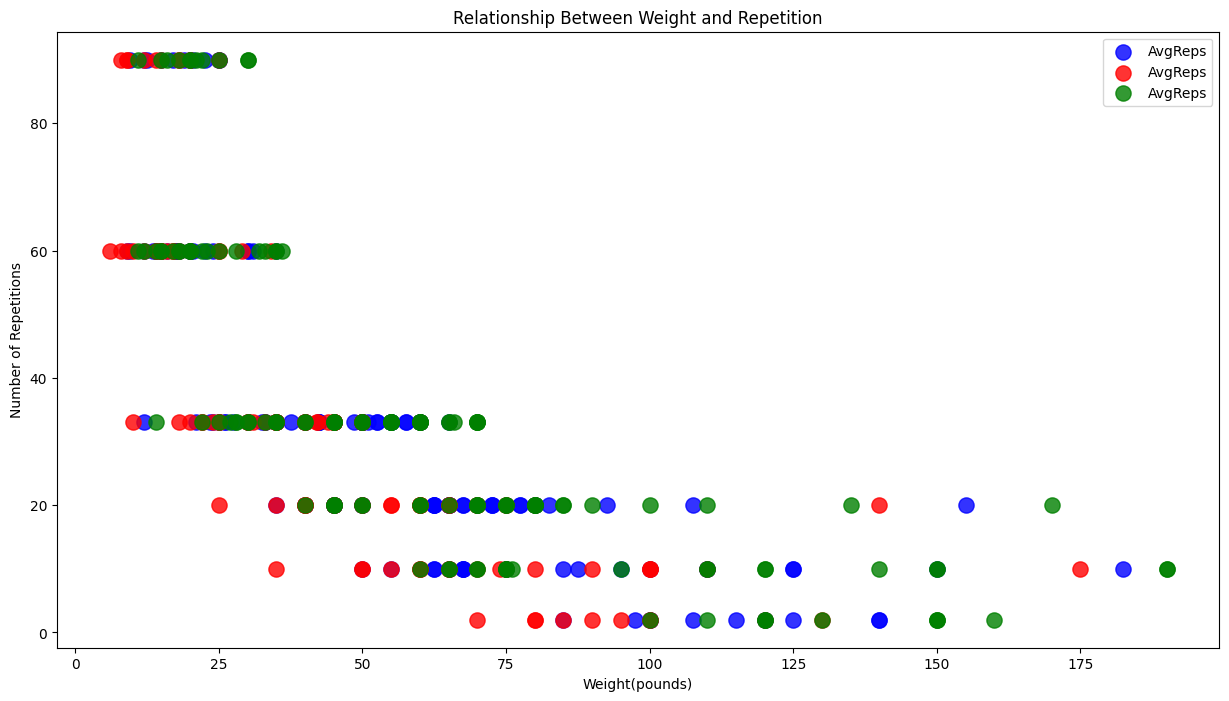

In [15]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb

#load in data
url = 'https://raw.githubusercontent.com/madrigranok/MAT421/main/DogIntelligence.csv'
df = pd.read_csv(url, encoding='ISO-8859-1')

columnRename = {"height_low_inches" : "MinHeight",
                "height_high_inches" : "MaxHeight",
                "weight_low_lbs" : "MinWeight",
                "weight_high_lbs" : "MaxWeight",
                "reps_lower" : "MinReps",
                "reps_upper" : "MaxReps"}
df.rename(columns = columnRename, inplace = True)

#we dont need the null values since that would be the row telling us the topic of the columns
df.isnull().sum()
df.dropna(inplace = True)
df.isnull().sum()

cRemove = ["MinHeight", "MaxHeight", "MinWeight", "MaxWeight"]
for i in cRemove:
  df = df.loc[df[i] > 0]

#avgs
df["AvgHeight"] = (df["MinHeight"] + df["MaxHeight"])/2;
df["AvgWeight"] = (df["MinWeight"] + df["MaxWeight"])/2;
df["AvgReps"] = round((df["MinReps"] + df["MaxReps"])/2);

#rearrange
df = df[["Breed", "MinHeight", "AvgHeight", "MaxHeight", "MinWeight", "AvgWeight", "MaxWeight", "MinReps", "AvgReps", "MaxReps"]]

smol = df[["Breed", "MinHeight"]].loc[df["MinHeight"] > 0].sort_values("MinHeight", ascending = True).head(10).copy();
smol = smol.reset_index(drop = True);  #top10smol

tall = df[["Breed", "MaxHeight"]].loc[df["MaxHeight"] > 0].sort_values("MaxHeight", ascending = False).head(10).copy();
tall = tall.reset_index(drop = True);
tall["MaxHeight"] = round(tall["MaxHeight"], 2); #top10tall

avgsmol = df[["Breed", "AvgHeight"]].loc[df["AvgHeight"] > 0].sort_values("AvgHeight", ascending = True).head(10).copy();
avgsmol = avgsmol.reset_index(drop = True); #top10avgsmol
avgtall = df[["Breed", "AvgHeight"]].loc[df["AvgHeight"] > 0].sort_values("AvgHeight", ascending = False).head(10).copy();
avgtall = avgtall.reset_index(drop = True); #top10avgtall

light = df[["Breed", "MinWeight"]].loc[df["MinWeight"] > 0].sort_values("MinWeight", ascending = True).head(10).copy();
light = light.reset_index(drop = True); #top10light

heavy = df[["Breed", "MaxWeight"]].loc[df["MaxWeight"] > 0].sort_values("MaxWeight", ascending = False).head(10).copy();
heavy = heavy.reset_index(drop = True); #top10heavy
 
avglight = df[['Breed','AvgWeight']].loc[df['AvgWeight'] > 0].sort_values('AvgWeight', ascending = True).head(10).copy()
avglight = avglight.reset_index(drop = True); #top10avglight
avgheavy = df[["Breed", "AvgWeight"]].loc[df["AvgWeight"] > 0].sort_values("AvgWeight", ascending = False).head(10).copy();
avgheavy = avgheavy.reset_index(drop = True); #top10avgheavy


#10 smallest breeds in the study
plt.figure(figsize=(10,5))
plt.title("10 Smallest Breeds in this Study")
plt.bar(data = smol, x = "Breed", height = "MinHeight", color = "pink", alpha = .6, width = .5)
plt.xticks(rotation = 90)
plt.ylim(0,12)
for i in range(len(smol)):
  position = smol["Breed"].loc[i];
  height = smol["MinHeight"].loc[i] +1;
  text = str(smol["MinHeight"].loc[i])
  plt.text(position, height, text, ha = "center", fontsize = 10)
plt.ylabel("Height(inches)")
plt.xlabel("Breed")
plt.show()

#10 smallest avg breeds in the study
plt.figure(figsize=(10,5))
plt.title("10 Smallest Average Breeds in this Study")
plt.bar(data = avgsmol, x = "Breed", height = "AvgHeight", color = "pink", alpha = .6, width = .5)
plt.xticks(rotation = 90)
plt.ylim(0,12)
for i in range(len(smol)):
  position = avgsmol["Breed"].loc[i];
  height = avgsmol["AvgHeight"].loc[i] +1;
  text = str(avgsmol["AvgHeight"].loc[i])
  plt.text(position, height, text, ha = "center", fontsize = 10)
plt.ylabel("Height(inches)")
plt.xlabel("Breed")
plt.show()

#10 tallest breeds in the study
plt.figure(figsize=(10,5))
plt.title("10 Tallest Breeds in this Study")
plt.bar(data = tall, x = "Breed", height = "MaxHeight", color = "green", alpha = .6, width = .5)
plt.xticks(rotation = 90)
plt.ylim(0,70)
for i in range(len(smol)):
  position = tall["Breed"].loc[i];
  height = tall["MaxHeight"].loc[i] +4;
  text = str(tall["MaxHeight"].loc[i]);
  plt.text(position, height, text, ha = "center", fontsize = 10)
plt.ylabel("Height(inches)")
plt.xlabel("Breed")
plt.show()

#10 tallest avg breeds in the study
plt.figure(figsize=(10,5))
plt.title("10 Tallest Average Breeds in this Study")
plt.bar(data = avgtall, x = "Breed", height = "AvgHeight", color = "green", alpha = .6, width = .5)
plt.xticks(rotation = 90)
plt.ylim(0,70)
for i in range(len(smol)):
  position = avgtall["Breed"].loc[i];
  height = avgtall["AvgHeight"].loc[i] +4;
  text = str(avgtall["AvgHeight"].loc[i]);
  plt.text(position, height, text, ha = "center", fontsize = 10)
plt.ylabel("Height(inches)")
plt.xlabel("Breed")
plt.show()

#10 lightest breeds in the study
plt.figure(figsize=(10,5))
plt.title("10 Lightest Breeds in this Study")
plt.bar(data = light, x = "Breed", height = "MinWeight", color = "blue", alpha = .6, width = .5)
plt.xticks(rotation = 90)
plt.ylim(0,15)
for i in range(len(smol)):
  position = light["Breed"].loc[i];
  height = light["MinWeight"].loc[i] +.2;
  text = str(light["MinWeight"].loc[i]);
  plt.text(position, height, text, ha = "center", fontsize = 10)
plt.ylabel("Weight(pounds)")
plt.xlabel("Breed")
plt.show()

#10 average lightest breeds in the study
plt.figure(figsize=(10,5))
plt.title("10 Lightest Average Breeds in this Study")
plt.bar(data = avglight, x = "Breed", height = "AvgWeight", color = "blue", alpha = .6, width = .5)
plt.xticks(rotation = 90)
plt.ylim(0,15)
for i in range(len(smol)):
  position = avglight["Breed"].loc[i];
  height = avglight["AvgWeight"].loc[i] +.2;
  text = str(avglight["AvgWeight"].loc[i]);
  plt.text(position, height, text, ha = "center", fontsize = 10)
plt.ylabel("Weight(pounds)")
plt.xlabel("Breed")
plt.show()

#10 heaviest breeds in the study
plt.figure(figsize=(10,5))
plt.title("10 Heaviest Breeds in this Study")
plt.bar(data = heavy, x = "Breed", height = "MaxWeight", color = "orange", alpha = .6, width = .5)
plt.xticks(rotation = 90)
plt.ylim(0,200)
for i in range(len(smol)):
  position = heavy["Breed"].loc[i];
  height = heavy["MaxWeight"].loc[i] +.2;
  text = str(heavy["MaxWeight"].loc[i]);
  plt.text(position, height, text, ha = "center", fontsize = 10)
plt.ylabel("Weight(pounds)")
plt.xlabel("Breed")
plt.show()

#10 heaviest average breeds in the study
plt.figure(figsize=(10,5))
plt.title("10 Heaviest Average Breeds in this Study")
plt.bar(data = avgheavy, x = "Breed", height = "AvgWeight", color = "orange", alpha = .6, width = .5)
plt.xticks(rotation = 90)
plt.ylim(0,200)
for i in range(len(smol)):
  position = avgheavy["Breed"].loc[i];
  height = avgheavy["AvgWeight"].loc[i] +.2;
  text = str(avgheavy["AvgWeight"].loc[i]);
  plt.text(position, height, text, ha = "center", fontsize = 10)
plt.ylabel("Weight(pounds)")
plt.xlabel("Breed")
plt.show()

#distribution of minimum repetition
plt.figure(figsize=(10,5))
sb.countplot(data = df, x = "MinReps", color = "indigo", alpha = 0.6)
plt.title("Count Distribution of Minimum Number of Repetition Calls")
plt.show()

#distribution of maximum repetition
plt.figure(figsize=(10,5))
sb.countplot(data = df, x = "MaxReps", color = "indigo", alpha = 0.6)
plt.title("Count Distribution of Maximum Number of Repetition Calls")
plt.show()

#distribution of average repetition
plt.figure(figsize=(10,5))
sb.countplot(data = df, x = "AvgReps", color = "indigo", alpha = 0.6)
plt.title("Count Distribution of Average Number of Repetition Calls")
plt.show()

#correlation heat map
plt.figure(figsize=(10,10))
sb.heatmap(df.corr(), annot = True, cmap = "BuPu", linewidth = 0.01)
plt.title("Correlation Heatmap")
plt.show()

#height and reps
plt.figure(figsize=(15,8))
plt.scatter(data = df, x = "AvgHeight", y = "AvgReps", color = "blue", alpha = 0.8, s = 120)
plt.scatter(data = df, x = "MinHeight", y = "AvgReps", color = "red", alpha = 0.8, s = 120)
plt.scatter(data = df, x = "MaxHeight", y = "AvgReps", color = "green", alpha = 0.8, s = 120)
plt.legend()
plt.title("Relationship Between Height and Repetition")
plt.xlabel("Height(inches)")
plt.ylabel("Number of Repetitions")
plt.show()

#weight and reps
plt.figure(figsize=(15,8))
plt.scatter(data = df, x = "AvgWeight", y = "AvgReps", color = "blue", alpha = 0.8, s = 120)
plt.scatter(data = df, x = "MinWeight", y = "AvgReps", color = "red", alpha = 0.8, s = 120)
plt.scatter(data = df, x = "MaxWeight", y = "AvgReps", color = "green", alpha = 0.8, s = 120)
plt.legend()
plt.title("Relationship Between Weight and Repetition")
plt.xlabel("Weight(pounds)")
plt.ylabel("Number of Repetitions")
plt.show()

## References
https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec

https://www.kaggle.com/datasets/jasleensondhi/dog-intelligence-comparison-based-on-size?select=Dog+Intelligence.csv

https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92